## Gruppierungen und Aggregationen
Hier sind einige Aufgaben für die Verwendung von groupby mit der Titanic-Datenbank (titanic.csv). Diese Aufgaben sollen helfen, das Verständnis für Gruppierungen und Aggregationen zu verbessern.

### Aufgabe 0
Importiere die benötigten Bibliotheken und erstelle mit der Datei `titanic.csv` ein DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/titanic.csv')

### Aufgabe 0.5
Verschaffe dir einen Überblick über die Daten, welche Spalten gibt es, welche Datentypen haben diese, etc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Aufgabe 1: Überlebensrate nach Klasse
Gruppiere die Daten nach der Klasse (Pclass) und berechne die Überlebensrate für jede Klasse.<br>
Hinweis: Verwende die mean-Funktion auf der Spalte Survived, um die Überlebensrate zu berechnen.

In [6]:
gr = df.groupby('Pclass')
gr.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [10]:
(gr.Survived.mean()*100).round(2)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

### Aufgabe 2: Durchschnittsalter nach Geschlecht und Klasse
Berechne das Durchschnittsalter (Age) der Passagiere, gruppiert nach Geschlecht (Sex) und Klasse (Pclass).<br>
Untersuche, ob es signifikante Unterschiede im Durchschnittsalter zwischen den Klassen und Geschlechtern gibt.

In [ ]:
gr_s_p = df.groupby(['Sex', 'Pclass'])
gr_s_p.first()

PassengerId  Survived  \
Sex    Pclass                          
female 1                 2         1   
       2                10         1   
       3                 3         1   
male   1                 7         0   
       2                18         1   
       3                 1         0   

                                                            Name   Age  SibSp  \
Sex    Pclass                                                                   
female 1       Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
       2                     Nasser, Mrs. Nicholas (Adele Achem)  14.0      1   
       3                                  Heikkinen, Miss. Laina  26.0      0   
male   1                                 McCarthy, Mr. Timothy J  54.0      0   
       2                            Williams, Mr. Charles Eugene  35.0      0   
       3                                 Braund, Mr. Owen Harris  22.0      1   

               Parch            Ticket     Fare  Cabin Embarked  
Sex    Pclass                                                    
female 1           0          PC 17599  71.2833    C85        C  
       2           0            237736  30.0708    F33        C  
       3           0  STON/O2. 3101282   7.9250     G6        S  
male   1           0             17463  51.8625    E46        S  
       2           0            244373  13.0000    D56        S  
       3           0         A/5 21171   7.2500  F G73        S

In [17]:
gr_s_p.Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
gr_s_p.Age.mean()['female'] - gr_s_p.Age.mean()['male']

Pclass
1   -6.669621
2   -2.017734
3   -4.757589
Name: Age, dtype: float64

### Aufgabe 3: Analyse der Ticketpreise nach Überlebensstatus
Gruppiere die Daten nach dem Überlebensstatus (Survived) und berechne den durchschnittlichen Ticketpreis (Fare) für Überlebende und Nicht-Überlebende.<br>
Berechne zusätzlich den Median und die Standardabweichung des Ticketpreises für jede Gruppe.<br>
Wieviele Passagiere haben keine Gebühr (also 0) bezahlt ?

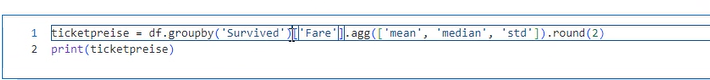

In [ ]:
gr_survived = df.groupby('Survived',)
gr_survived.first()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
gr_survived.size()

Survived
0    549
1    342
dtype: int64

In [22]:
gr_survived.get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [23]:
gr_survived.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [26]:
gr_survived.describe()

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                Pclass            ... Parch        Fare                        \
            max  count      mean  ...   75%  max  count       mean        std   
Survived                          ...                                           
0         891.0  549.0  2.531876  ...   0.0  6.0  549.0  22.117887  31.388207   
1         890.0  342.0  1.950292  ...   1.0  5.0  342.0  48.395408  66.596998   

                                              
          min      25%   50%   75%       max  
Survived                                      
0         0.0   7.8542  10.5  26.0  263.0000  
1         0.0  12.4750  26.0  57.0  512.3292  

[2 rows x 48 columns]

In [32]:
gr_survived.agg(
    median_fare = ('Fare', 'median'),
    std_fare = ('Fare', 'std'),
    min_fare = ('Fare', 'min'),
    max_fare = ('Fare', 'max')
)

,median_fare,std_fare,min_fare,max_fare
Survived,,,,
0,10.5,31.388207,0.0,263.0000
1,26.0,66.596998,0.0,512.3292


In [20]:
gr_survived.Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [56]:
zero_fare_count = df[df['Fare'] == 0].shape[0]
zero_fare_count

15

In [30]:
gr_survived.Fare.first()

Survived
0     7.2500
1    71.2833
Name: Fare, dtype: float64

In [35]:
gr_survived.Fare.min().value_counts()

Fare
0.0    2
Name: count, dtype: int64

### Aufgabe 4: Geschlechterverteilung pro Klasse
Bestimme die Anzahl der männlichen und weiblichen Passagiere in jeder Klasse (Pclass).<br>
Überlege, wie man die Daten visualisieren könnte, um die Geschlechterverteilung je Klasse zu zeigen.

In [14]:
gr_p_s = df.groupby(['Pclass', 'Sex'])
gr_p_s.size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

### Aufgabe 5: Altersspannenanalyse
Erstelle eine neue Spalte Altersgruppe, die Passagiere nach Alter gruppiert, z.B. 0–12 (Kinder), 13–19 (Teenager), 20–35 (junge Erwachsene), 36–60 (Erwachsene), 60+ (Senioren). <br>
Gruppiere die Daten nach Altersgruppe und berechne die Überlebensrate für jede Altersgruppe.

In [7]:
def age_gr(x):
    if 0 <= x <=12:
        return 'Kinder'
    if 13 <= x <=19:
        return 'Teenager'
    if 20 <= x <=35:
        return 'Junge'
    if 36 <= x <=60:
        return 'Erwachsene'
    if x > 60:
        return 'Senioren'


In [8]:
df['Altersgruppe'] = df.Age.apply(age_gr)

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Altersgruppe
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Junge
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsene
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Junge
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Junge
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Junge
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Erwachsene
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Kinder
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Junge
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


In [53]:
gr_algr = df.groupby('Altersgruppe')
gr_algr.size()

Altersgruppe
Erwachsene    195
Junge         333
Kinder         69
Senioren       22
Teenager       95
dtype: int64

In [55]:
gr_algr.Survived.mean()

Altersgruppe
Erwachsene    0.400000
Junge         0.384384
Kinder        0.579710
Senioren      0.227273
Teenager      0.410526
Name: Survived, dtype: float64

### Aufgabe 6: Kabinenanalyse nach Deck
Extrahiere den ersten Buchstaben der Cabin-Spalte, um das Deck zu bestimmen.<br>
Gruppiere die Daten nach Deck und berechne die Überlebensrate für jedes Deck.<br>
Hinweis: Nicht alle Passagiere haben eine Kabinenangabe; diese sollten entsprechend behandelt werden.<br>
Berechne anschließend wieviele Passagiere auf dem jeweiligen Deck untergebracht waren.

In [57]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df['Deck'] = df['Cabin'].str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Altersgruppe,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Junge,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsene,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Junge,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Junge,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Junge,NaN


In [65]:
df.groupby('Deck').size()

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64

In [ ]:
# Überlebensrate
df.groupby('Deck')['Survived'].mean()


Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [ ]:
df['Deck'].isnull()

np.int64(687)

In [ ]:
# Anzahl der Passagiere
df['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

### ausgabe für aufgabe4 

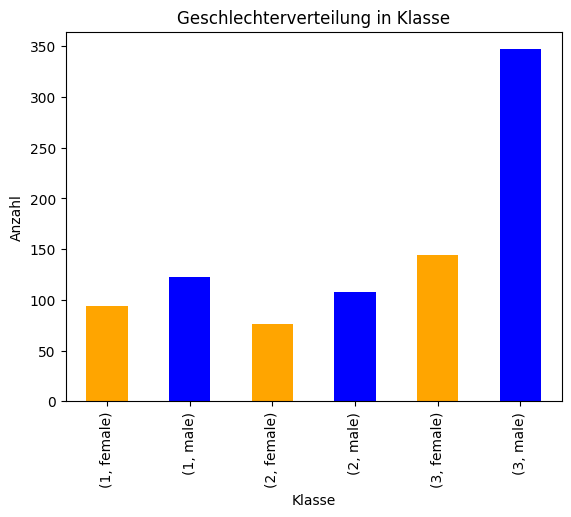

In [23]:

gr_ = gr_p_s.size()
gr_.plot(kind='bar', color=['orange', 'blue'])
plt.title('Geschlechterverteilung in Klasse')
plt.xlabel('Klasse')
plt.ylabel('Anzahl');

In [25]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

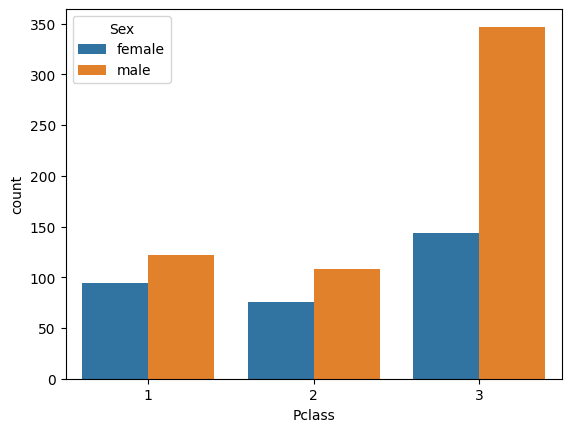

In [29]:
sns.countplot(df, x="Pclass", hue="Sex")